# AMATH 585 Final
## Shannon Dow
### Problem 6

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from numpy import *

### Part(a)
Solving $u''(x) = f(x) $ for $0 \leq x \leq 1$
With mixed robin and dirichlet boundary conditions:
$$\gamma_0 u(0) + \gamma_1 u'(0) = \sigma $$  $$ u(1) = \beta $$ 


In [3]:
def solve_BVP (u_true, f_fcn, gam0,gam1,sig,beta,m):
    #u_true is the true u fcn that will be used to calculate the errors
    #f_fcn is the f from Au = f
    # gam0, gam1 and sig correspond to the coefficients in the robin conditons
    # beta is the right hand dirichlet boundary data
    # m is the number of gridpoints
    
    #Returns
    # It returns an array of the interior gridpoints and the U values at those interior grid points

    from scipy import sparse
    from scipy.sparse.linalg import spsolve
    import scipy.linalg
    
    #This solves this ODE on 0 to 1
    a = 0
    b = 1
    
    #Initialize the vector of erros
    errors = [];

    #calculate h
    h = (b-a)/(m+1)
    x = linspace(a,b,m+2)

    em = ones(m+1)
    em1 = ones(m)
    A = sparse.diags([em1,-2*em,em1],[-1,0,1], shape=(m+1,m+1)).toarray()
    A[0,0] = h**2*gam0 - h*gam1
    A[0,1] = h*gam1
    A = A/(h**2)

    #Edit f
    xint = linspace(a,b-h,m+1)
    b = f_fcn(xint)
    b[0] = sig+ (gam1*h)/(2)*b[0]
    b[m] = b[m] - beta/(h**2)
    b = b.T
    #Solve the system
    u_approx = linalg.solve(A,b) 
    
    utrue = u_true(xint)
    errors = abs(utrue - u_approx).max()
   
    return xint, u_approx, errors

### Part (b) 
Here I will implement the above code function to solve this BVP:
$$\begin{align*}
&u''(x) = 4, \qquad 0\leq x \leq 1,\\
&2u(0) + 3u'(0) = 1, \qquad u(1)=2,
\end{align*}$$
which has exact solution $$u(x) = 2x^2 + x - 1$$.

In [4]:
f_fcn1 = lambda x: 0*x +4
u_true1 = lambda x: 2*x**2 + x -1
gamma0 = 2
gamma1 = 3
sigma = 1
beta = 2
m = 5
xint, uapprox, error = solve_BVP(u_true1, f_fcn1, gamma0,gamma1,sigma,beta,m)
x = linspace(0,1,m+2)

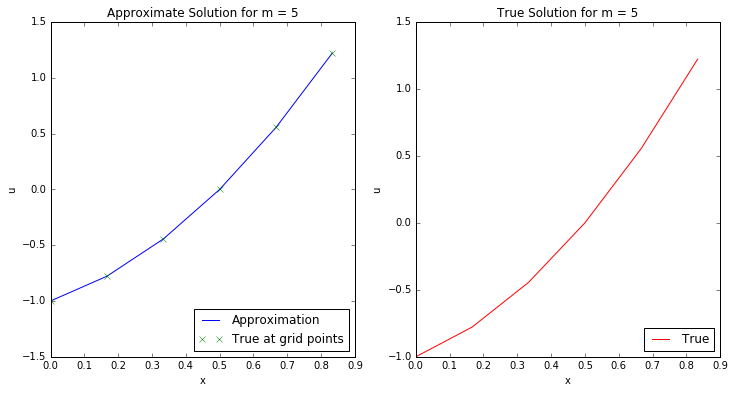

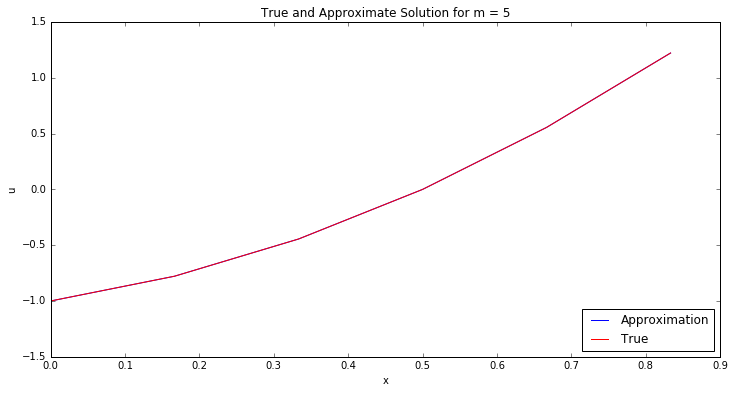

In [5]:
figure(figsize=(12,6))
subplot(121)
plot(xint,uapprox,label = 'Approximation')
plot(xint, u_true1(xint), 'gx',label = 'True at grid points')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('Approximate Solution for m = '+ str(m))
subplot(122)
plot(xint,u_true1(xint),'r', label = 'True')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('True Solution for m = '+ str(m))

figure(3)
figure(figsize=(12,6))
plot(xint,uapprox,label = 'Approximation')
plot(xint,u_true1(xint),'r', label = 'True')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('True and Approximate Solution for m = '+ str(m))


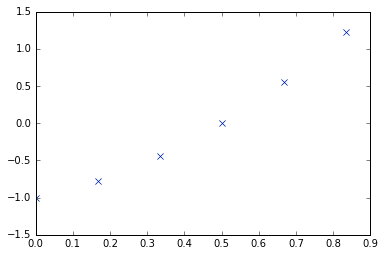

In [6]:
plot(xint,u_true1(xint),'gx')
plot(xint,uapprox,'bx')

From the implementation seen above, it is clear that the exact solution to the linear system aggree with the exact solution to the ODE at the gridpoints. This is likely due to the fact that the f function is constant. 

### Part(c)
Here I will implement the above code function to solve this BVP:
\begin{align*}
&u''(x) = -18x + 4, \qquad 0\leq x \leq 1,\\
&2u(0) + 3u'(0) = 1, \qquad u(1)=-1,
\end{align*}
which has exact solution: 
 $$u(x) = -3x^3 + 2x^2 + x - 1$$

In [17]:
f_fcn1 = lambda x: -18*x +4
u_true1 = lambda x: -3*x**3+2*x**2+x-1
gamma0 = 2
gamma1 = 3
sigma = 1
beta = -1
m = 19
xint, uapprox, error = solve_BVP(u_true1, f_fcn1, gamma0,gamma1,sigma,beta,m)
x = linspace(0,1,m+2)

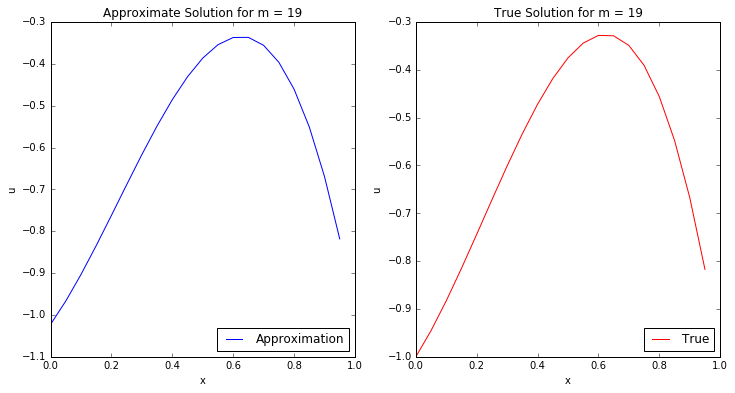

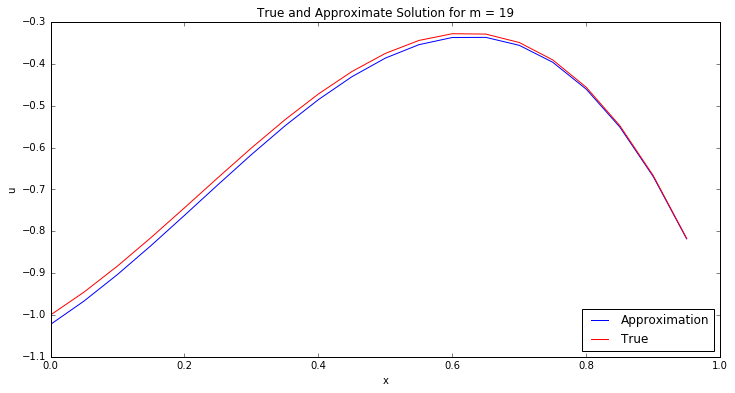

In [18]:
figure(figsize=(12,6))
subplot(121)
plot(xint,uapprox,label = 'Approximation')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('Approximate Solution for m = '+ str(m))
subplot(122)
plot(xint,u_true1(xint),'r', label = 'True')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('True Solution for m = '+ str(m))

figure(3)
figure(figsize=(12,6))
plot(xint,uapprox,label = 'Approximation')
plot(xint,u_true1(xint),'r', label = 'True')
legend(loc='lower right')
xlabel('x')
ylabel('u')
title('True and Approximate Solution for m = '+ str(m))

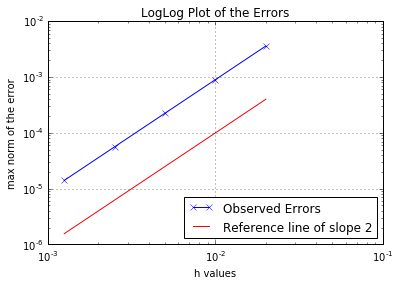

In [9]:
m_vals = [49,99,199,399,799]
error_vals = []
h_vals = []
eref = []
for m in m_vals:
    xint, uapprox, error = solve_BVP(u_true1, f_fcn1, gamma0,gamma1,sigma,beta,m)
    error_vals.append(error)
    h_vals.append(1/(m+1))
    eref.append((1/(m+1))**2)
    
loglog(h_vals,error_vals,'bx-',label = 'Observed Errors')
loglog(h_vals, eref, 'r-', label='Reference line of slope 2')
grid(True)
xlabel('h values')
ylabel('max norm of the error')
legend(loc='lower right')
title('LogLog Plot of the Errors')

This validates that the method is second order accurate, as it has the same slope = 2 as the reference line.

## Question 3 Work: 

In [10]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
def animate_figs(figs):
    show_frame = lambda frameno: display(figs[frameno])
    interact(show_frame, frameno=widgets.IntSlider(min=0,max=len(figs)-1, value=0))

In [11]:
def update_u_GS(U, F, h):
    """
    Input: Current iterate U^[k-1]
    Output: Next iterate U^[k]
    """
    m = len(U) - 2
    for i in range(1,m+1):
        U[i] = U[i-1] + h*F[i]
    print(size(U))
    return U

In [12]:
def solve_bvp(f_fcn, utrue_fcn, m, update_u, maxiter, kplot):

    alpha = utrue_fcn(0)
    beta = utrue_fcn(1)

    h = 1./(m+1)
    x = linspace(0,1-h,m+1)

    utrue = utrue_fcn(x)
    F = f_fcn(x)
    F[0] = alpha/h

    U0 = linspace(alpha, beta-h, m+1) # initial guess
    U = U0.copy() # current iterate

    max_error = abs(U-utrue).max()
    errors = [max_error]

    figs = []  # for the list of figures we generate
    
    for k in range(1,maxiter+1):
                
        U = update_u(U, F, h)  # take one iteration
        
        max_error = abs(U-utrue).max()
        errors.append(max_error)

        if mod(k,kplot)==0 or k==maxiter:
            # every kplot iterations create a plot:
            fig = figure(figsize=(12,5))
            plot(x,U0,'r-o', label='initial guess')
            plot(x,utrue,'k-o', label='true solution')
            plot(x,U,'bo-', label= 'iteration k = %i' % k)
            legend()
            grid(True)
            title('After %i iterations, max error = %.2e' \
                  % (k, max_error))
            figs.append(fig)
            #close(fig)
            
    errors = array(errors)  # convert list to numpy array
    return errors, figs

In [13]:
f_fcn = lambda x: 12*x
utrue_fcn = lambda x: 6*x**2+9
m=100

101
101
101
101
101
101
101
101
101
101


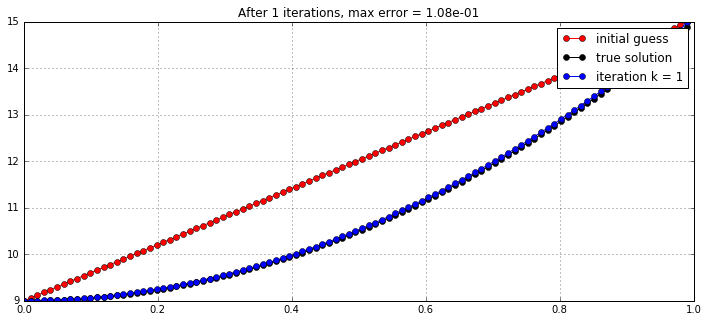

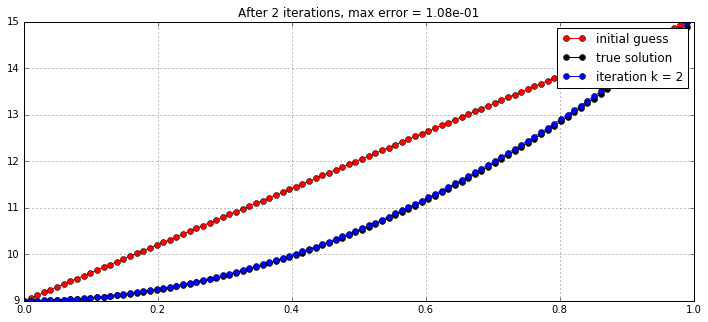

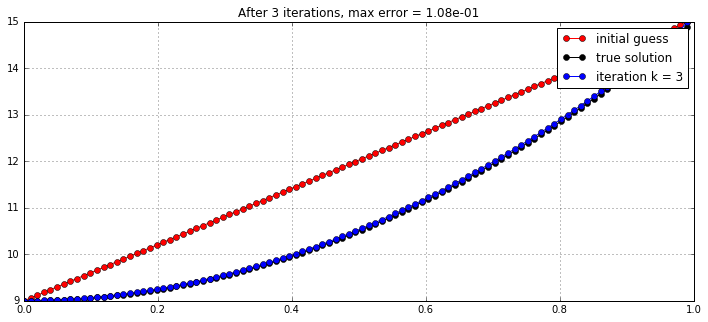

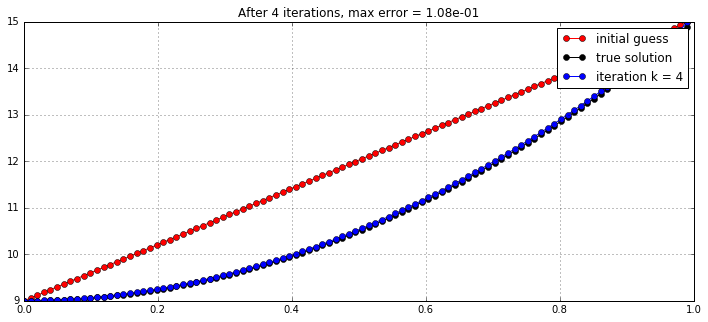

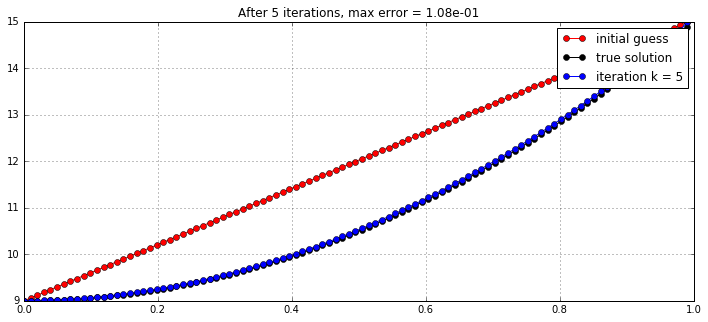

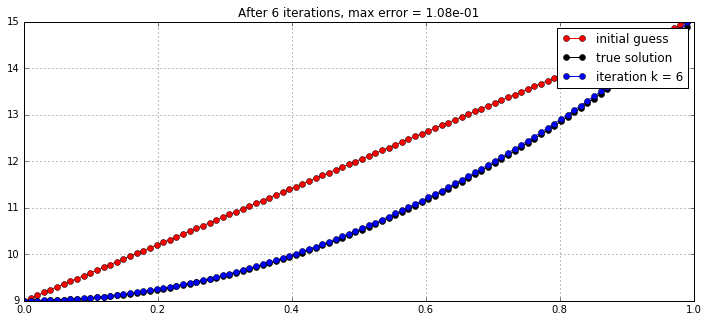

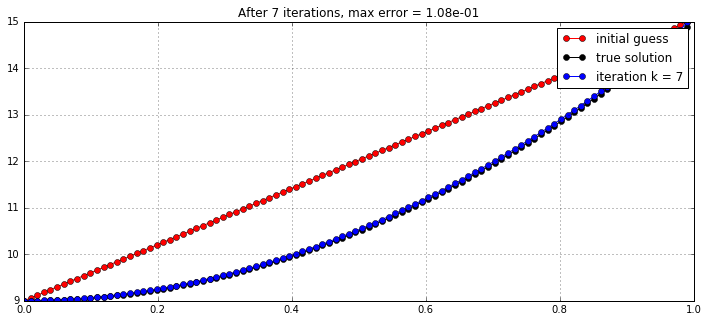

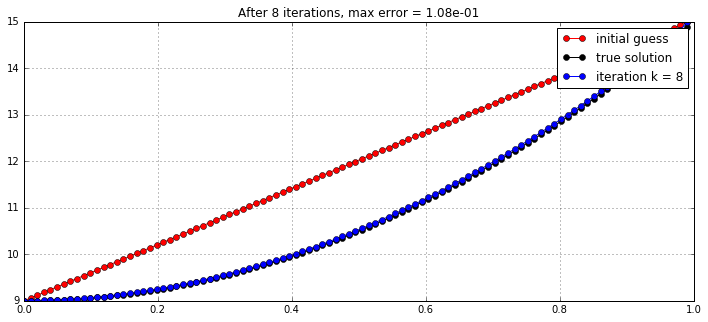

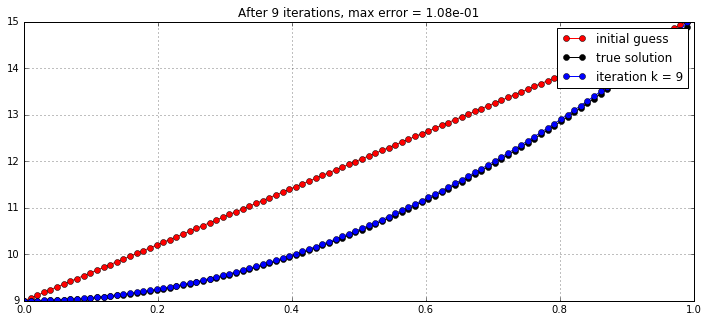

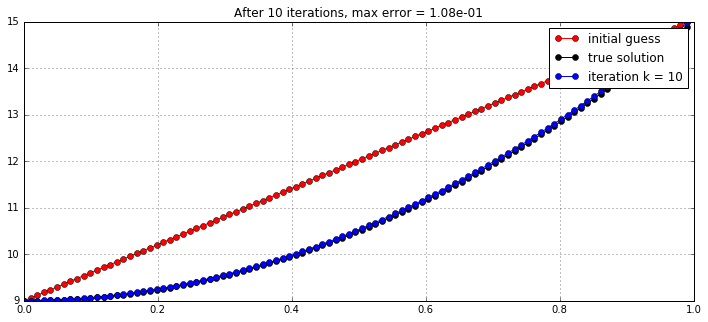

In [14]:
errors_GS, figs = solve_bvp(f_fcn, utrue_fcn, m=m, update_u=update_u_GS, 
                            maxiter=10, kplot=1)

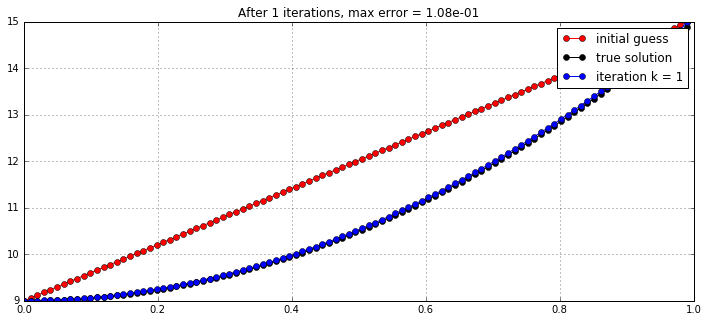

In [15]:
animate_figs(figs)